In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from keras.models import Sequential, Model
from keras.layers import Input, Lambda, Dense, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras import metrics
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K


env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [93]:
(x_train0, y_train0),(x_test0, y_test0) = mnist.load_data()

In [94]:
x_train = x_train0.reshape(60000,-1)
x_test = x_test0.reshape(10000,-1)

x_train -= x_train.min()
x_train = x_train/x_train.max()

x_test -= x_test.min()
x_test = x_test/x_test.max()

In [95]:
x = Input(shape=(784,))

enc_1 = Dense(10, activation='sigmoid')
enc_2 = Dense(2, activation='sigmoid')

h = enc_2(enc_1(x))

dec_2 = Dense(10, activation='sigmoid')
dec_1 = Dense(784, activation='sigmoid')

x_hat = dec_1(dec_2(h))

In [96]:
autoencoder = Model(x, x_hat)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_28 (Dense)             (None, 784)               8624      
Total params: 16,526
Trainable params: 16,526
Non-trainable params: 0
_________________________________________________________________


In [97]:
autoencoder.compile(loss='mse',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [98]:
autoencoder.fit(x_train, x_train, batch_size=100, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 14s 228us/step - loss: 0.1004 - acc: 0.0141


In [99]:
Encoder = Model(x,h)
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 22        
Total params: 7,872
Trainable params: 7,872
Non-trainable params: 0
_________________________________________________________________


In [100]:
h_input = Input(shape=(2,))

Decoder = Model(h_input, dec_1(dec_2(h_input)))
Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_28 (Dense)             (None, 784)               8624      
Total params: 8,654
Trainable params: 8,654
Non-trainable params: 0
_________________________________________________________________


In [101]:
idx = 333
Encoder.predict(x_test[idx:idx+1])

array([[ 0.97105372,  0.90669489]], dtype=float32)

In [102]:
indices = np.random.randint(10000,size=3000)

In [103]:
latent = Encoder.predict(x_test[indices])
latent.shape

(3000, 2)

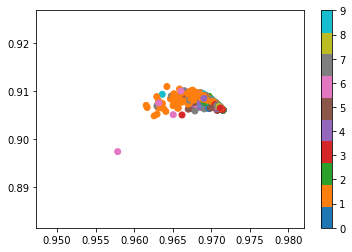

In [104]:
plt.scatter(latent[:,0],latent[:,1], c=y_test0[indices],cmap='tab10')
plt.colorbar()

In [90]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [91]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

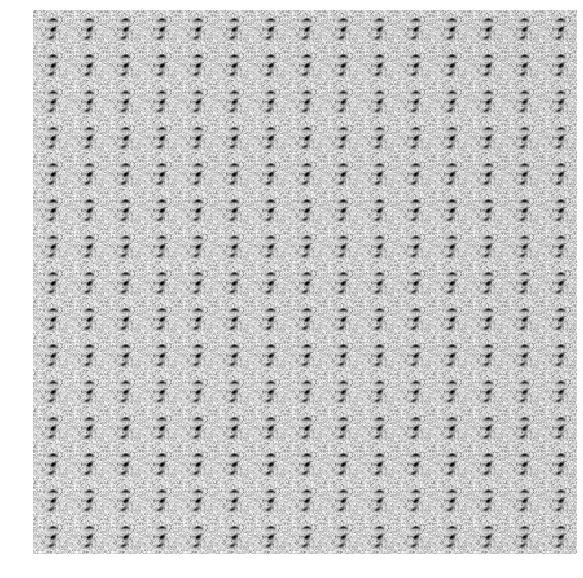

In [92]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys')
plt.axis('off')
plt.show()